In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('../nba_games_cleaned_with_avgs.csv', index_col = False)
df.head()

,game_id,date,team,total,team_opp,total_opp,won,fg,fga,fg%,...,opp_season_avg_ft%,opp_season_avg_orb,opp_season_avg_drb,opp_season_avg_trb,opp_season_avg_ast,opp_season_avg_stl,opp_season_avg_blk,opp_season_avg_tov,opp_season_avg_pf,opp_season_avg_pts
0,2015-10-27_ATL_DET,2015-10-27,DET,106,ATL,94,True,37.0,96.0,0.385,...,0.800,7.0,33.0,40.0,22.0,9.0,4.0,15.0,25.0,94.0
1,2015-10-27_ATL_DET,2015-10-27,ATL,94,DET,106,False,37.0,82.0,0.451,...,0.769,23.0,36.0,59.0,23.0,5.0,3.0,15.0,15.0,106.0
2,2015-10-27_CHI_CLE,2015-10-27,CLE,95,CHI,97,False,38.0,94.0,0.404,...,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0
3,2015-10-27_CHI_CLE,2015-10-27,CHI,97,CLE,95,True,37.0,87.0,0.425,...,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0
4,2015-10-27_GSW_NOP,2015-10-27,NOP,95,GSW,111,False,35.0,83.0,0.422,...,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0


In [3]:
df.columns.values

array(['game_id', 'date', 'team', 'total', 'team_opp', 'total_opp', 'won',
       'fg', 'fga', 'fg%', '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'ts%',
       'efg%', '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%',
       'blk%', 'tov%', 'usg%', 'ortg', 'drtg', 'fg_max', 'fga_max',
       'fg%_max', '3p_max', '3pa_max', '3p%_max', 'ft_max', 'fta_max',
       'ft%_max', 'orb_max', 'drb_max', 'trb_max', 'ast_max', 'stl_max',
       'blk_max', 'tov_max', 'pf_max', 'pts_max', '+/-_max', 'ts%_max',
       'efg%_max', '3par_max', 'ftr_max', 'orb%_max', 'drb%_max',
       'trb%_max', 'ast%_max', 'stl%_max', 'blk%_max', 'tov%_max',
       'usg%_max', 'ortg_max', 'drtg_max', 'home', 'index_opp', 'fg_opp',
       'fga_opp', 'fg%_opp', '3p_opp', '3pa_opp', '3p%_opp', 'ft_opp',
       'fta_opp', 'ft%_opp', 'orb_opp', 'drb_opp', 'trb_opp', 'ast_opp',
       'stl_opp', 'blk_opp', 'tov_opp', 'pf_opp', 'pts_opp', 'ts%_opp',
     

In [4]:
feature_selection = ['game_id', 'team', 'team_opp', 'won', 'home', 'season', 'season_avg_fg', 'season_avg_fga', 'season_avg_fg%', 'season_avg_3p', 
                     'season_avg_3pa', 'season_avg_3p%', 'season_avg_ft', 'season_avg_fta', 'season_avg_ft%','season_avg_orb', 'season_avg_drb', 
                     'season_avg_trb', 'season_avg_ast', 'season_avg_stl', 'season_avg_blk', 'season_avg_tov', 'season_avg_pf', 'season_avg_pts',
                     'opp_season_avg_fg', 'opp_season_avg_fga', 'opp_season_avg_fg%','opp_season_avg_3p', 'opp_season_avg_3pa', 'opp_season_avg_3p%',
                     'opp_season_avg_ft', 'opp_season_avg_fta', 'opp_season_avg_ft%', 'opp_season_avg_orb', 'opp_season_avg_drb', 'opp_season_avg_trb',
                     'opp_season_avg_ast', 'opp_season_avg_stl', 'opp_season_avg_blk', 'opp_season_avg_tov', 'opp_season_avg_pf', 'opp_season_avg_pts']

df_filtered = df[feature_selection]
df_filtered.head()

,game_id,team,team_opp,won,home,season,season_avg_fg,season_avg_fga,season_avg_fg%,season_avg_3p,...,opp_season_avg_ft%,opp_season_avg_orb,opp_season_avg_drb,opp_season_avg_trb,opp_season_avg_ast,opp_season_avg_stl,opp_season_avg_blk,opp_season_avg_tov,opp_season_avg_pf,opp_season_avg_pts
0,2015-10-27_ATL_DET,DET,ATL,True,0,2016,37.0,96.0,0.385,12.0,...,0.800,7.0,33.0,40.0,22.0,9.0,4.0,15.0,25.0,94.0
1,2015-10-27_ATL_DET,ATL,DET,False,1,2016,37.0,82.0,0.451,8.0,...,0.769,23.0,36.0,59.0,23.0,5.0,3.0,15.0,15.0,106.0
2,2015-10-27_CHI_CLE,CLE,CHI,False,0,2016,38.0,94.0,0.404,9.0,...,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0
3,2015-10-27_CHI_CLE,CHI,CLE,True,1,2016,37.0,87.0,0.425,7.0,...,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0
4,2015-10-27_GSW_NOP,NOP,GSW,False,0,2016,35.0,83.0,0.422,6.0,...,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0


In [5]:
X = df_filtered.drop(['game_id', 'team', 'team_opp', 'won'], axis = 1)
X = StandardScaler().fit_transform(X)
y = df_filtered['won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
def plot_confusion_matrix(cm):
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns = ['Predicted Loss', 'Predicted Win'], index = ['Actual Win', 'Actual Loss'])
    fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index), colorscale = 'Viridis')
    fig.update_layout(title_text = 'Confusion Matrix', showlegend = True,
                      width = 800, height = 400)
    fig.show(renderer = 'svg')

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    plot_confusion_matrix(cm)
    

Accuracy: 0.575
Precision: 0.583
Recall: 0.567
F1 Score: 0.575


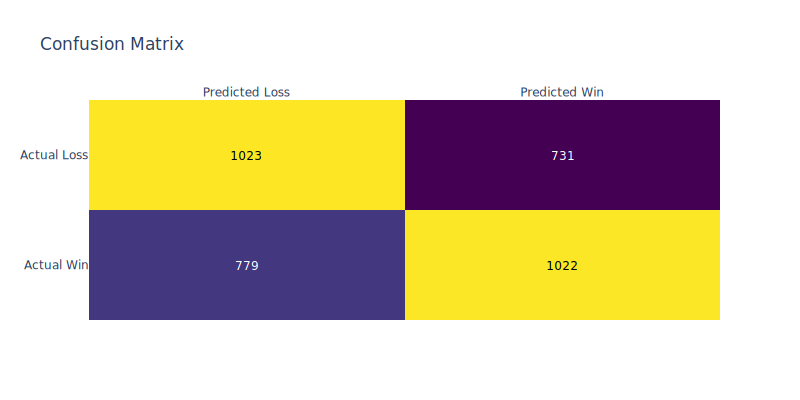

In [14]:
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
evaluate_model(base_model, X_train, X_test, y_train, y_test)

In [8]:
clf = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring='accuracy')

In [9]:
best_model = grid_search.fit(X_train, y_train)

In [10]:
print("Best parameters found: ", best_model.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


Accuracy: 0.603
Precision: 0.617
Recall: 0.568
F1 Score: 0.592


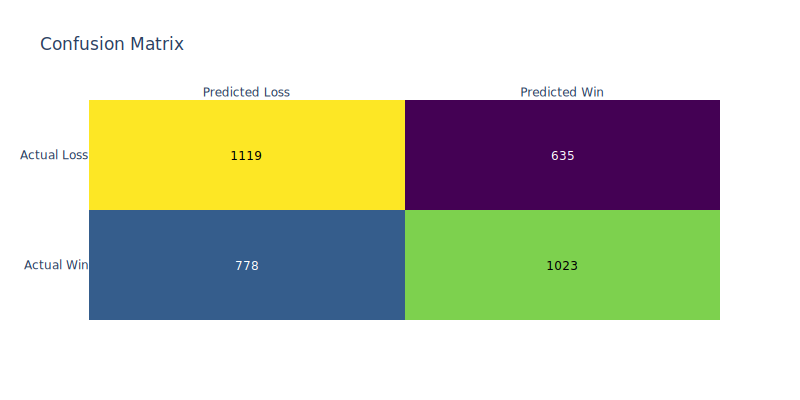

In [15]:
evaluate_model(best_model, X_train, X_test, y_train, y_test)  